In [425]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import parallel_coordinates

# Import Data and Preprocessing

* Data are scraped from Yahoo Finance and preprocessed in advance

In [426]:
stock = pd.read_csv('data/sp500_WithClusters_0414.csv')
stock_all = pd.read_csv('data/sp500_stock_0419.csv')
stock_all['Date'] = pd.to_datetime(stock_all['Date'])
stock_0323 = stock_all.loc[stock_all.Date == '2020-03-23', ['value','Symbol']].rename(columns={'value':'Closed_0323'})
stock_0416 = stock_all.loc[stock_all.Date == '2020-04-16', ['value','Symbol']].rename(columns={'value':'Closed_0416'})
stock = pd.merge(stock, stock_0323, on='Symbol', how='left')
stock = pd.merge(stock, stock_0416, on='Symbol', how='left')
stock['Weighted_VR_0323'] = stock['Market_Cap']*(stock['ValueRetention']/100)
stock['VR_0416'] = ((stock['Closed_0416']-stock['Closed_0214'])/stock['Closed_0214'])+100
stock['Weighted_VR_0416'] = stock['Market_Cap']*(stock['VR_0416']/100)
stock.head()

,Unnamed: 0,Symbol,Name,Closed_0214,%Percentage,Sector,GICS.Sub.Industry,Market_Cap,ValueRetention,ValueRetention*Market_Cap,kmedian_cluster,kmeans_cluster,Closed_0323,Closed_0416,Weighted_VR_0323,VR_0416,Weighted_VR_0416
0,0,MMM,3M Company,161.009995,-26.793363,Industrials,Industrial Conglomerates,92.680,73.206637,6784.791148,2,1,117.870003,144.899994,67.847911,99.899944,92.587268
1,1,ABT,Abbott Laboratories,89.660004,-29.935314,Health Care,Health Care Equipment,158.110,70.064686,11077.927443,2,1,62.820000,96.000000,110.779274,100.070712,158.221802
2,2,ABBV,AbbVie Inc.,94.050003,-31.419460,Health Care,Pharmaceuticals,139.110,68.580540,9540.238925,2,3,64.500000,81.860001,95.402389,99.870388,138.929697
3,3,ABMD,ABIOMED Inc,167.220001,-20.858752,Health Care,Health Care Equipment,7.535,79.141248,596.329306,2,1,132.339996,160.199997,5.963293,99.958019,7.531837
4,4,ACN,Accenture plc,212.369995,-32.339782,Information Technology,IT Consulting & Other Services,134.990,67.660218,9133.452878,2,3,143.690002,167.949997,91.334529,99.790837,134.707651


# Exploratory Analysis

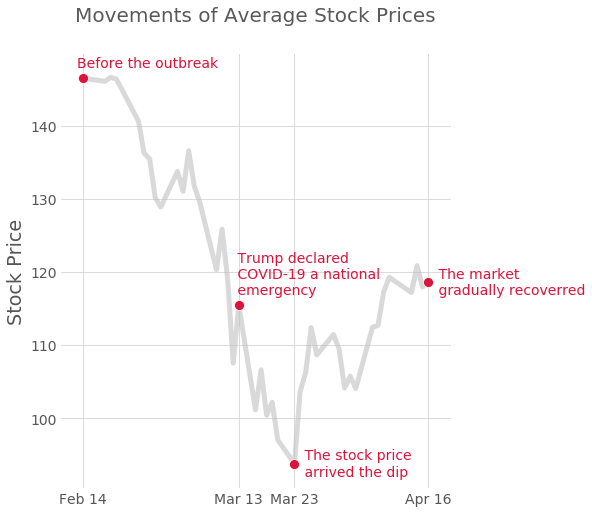

In [521]:
dates = pd.to_datetime(['2020-02-14', '2020-03-13', '2020-03-23', '2020-04-16'])
df_temp = stock_all.groupby('Date')['value'].mean().reset_index()
plt.style.use('ggplot')
plt.rc('font', **{'size'   : 16})

fig, ax = plt.subplots(figsize=[7,8])
sns.lineplot(data=df_temp, x='Date', y='value', color='silver', ax=ax, zorder=5, linewidth=5, alpha=.6)
sns.scatterplot(data=df_temp.loc[df_temp.Date.isin(dates)],
                x='Date', y='value', color='crimson', ax=ax, s=100, zorder=10)

#df_temp.loc[df_temp.Date.isin(dates)].plot.scatter(x='Date', y='value', color='red', ax=ax)
ax.set_facecolor('white')
ax.grid(True, color='lightgrey')
ax.set_xticks(dates)
ax.set_xticklabels(dates.strftime('%b %d').values)
ax.set_xlabel('')
ax.set_ylabel('Stock Price')
ax.tick_params(length=0, labelsize=14)

ax.text(pd.to_datetime(['2020-02-13']), df_temp.loc[df_temp.Date == '2020-02-14', 'value']+1.5, 'Before the outbreak', color='crimson', fontsize=14)
ax.text(pd.to_datetime(['2020-03-12']), df_temp.loc[df_temp.Date == '2020-03-13', 'value']+1.5, ' Trump declared\n COVID-19 a national\n emergency', color='crimson', fontsize=14, zorder=15)
ax.text(pd.to_datetime(['2020-03-24']), df_temp.loc[df_temp.Date == '2020-03-23', 'value'], ' The stock price\n arrived the dip', color='crimson', fontsize=14, zorder=15, va='center')
ax.text(pd.to_datetime(['2020-04-17']), df_temp.loc[df_temp.Date == '2020-04-16', 'value'], ' The market\n gradually recoverred', color='crimson', fontsize=14, zorder=15, va='center')

plt.title('Movements of Average Stock Prices', y=1.06, color='#595959', fontsize=20)
#plt.show()
plt.savefig('images/Movements of Average Stock Prices.png', facecolor='white', bbox_inches="tight", dpi=85)

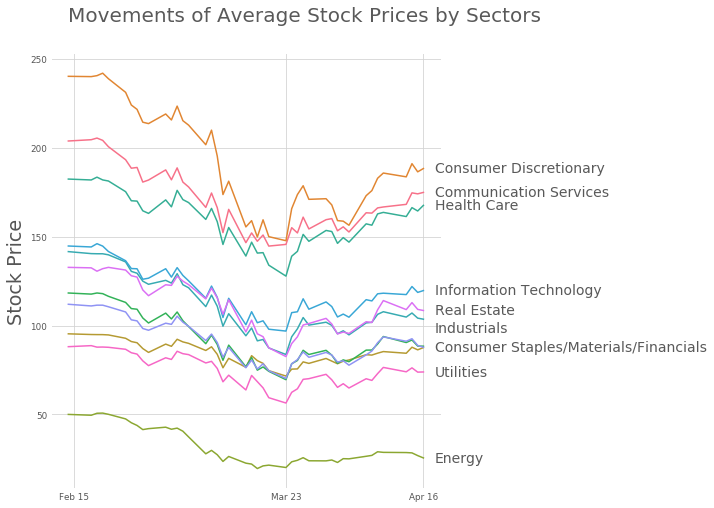

In [506]:
dates = pd.to_datetime(['2020-02-15', '2020-03-23', '2020-04-16'])
df_temp = stock_all.groupby(['Date', 'Sector'])['value'].mean().reset_index()
plt.style.use('ggplot')
plt.rc('font', **{'size'   : 16})

fig, ax = plt.subplots(figsize=[7,8])
sns.lineplot(data=df_temp,x='Date', y='value', hue='Sector', ax=ax, linewidth=1.5)

ax.set_facecolor('white')
ax.grid(True, color='lightgrey')
ax.set_xticks(dates)
ax.set_xticklabels(dates.strftime('%b %d').values)
ax.set_xlabel('')
ax.set_ylabel('Stock Price')
ax.tick_params(length=0)

for i, row in df_temp.loc[df_temp.Date == '2020-04-16'].iterrows():
    if row['Sector'] == 'Industrials':
        ax.text(pd.to_datetime('2020-04-18'), row['value']-5, row['Sector'], fontsize=14, ha='left',va='center', color='#595959')
    elif row['Sector'] == 'Materials':
        ax.text(pd.to_datetime('2020-04-18'), row['value'], 'Consumer Staples/Materials/Financials', fontsize=14, ha='left', va='center', color='#595959')
    elif row['Sector'] in ['Consumer Staples', 'Financials']:
        continue
    else:
        ax.text(pd.to_datetime('2020-04-18'), row['value'], row['Sector'], fontsize=14, ha='left', va='center', color='#595959')
#plt.legend(bbox_to_anchor=(1.02,1.03))


plt.title('Movements of Average Stock Prices by Sectors', x=.65, y=1.06, color='#595959', fontsize=20)
plt.legend().remove()
plt.show()
#plt.savefig('images/Movements of Average Stock Prices by Sectors.png', facecolor='white', bbox_inches="tight", dpi=85)

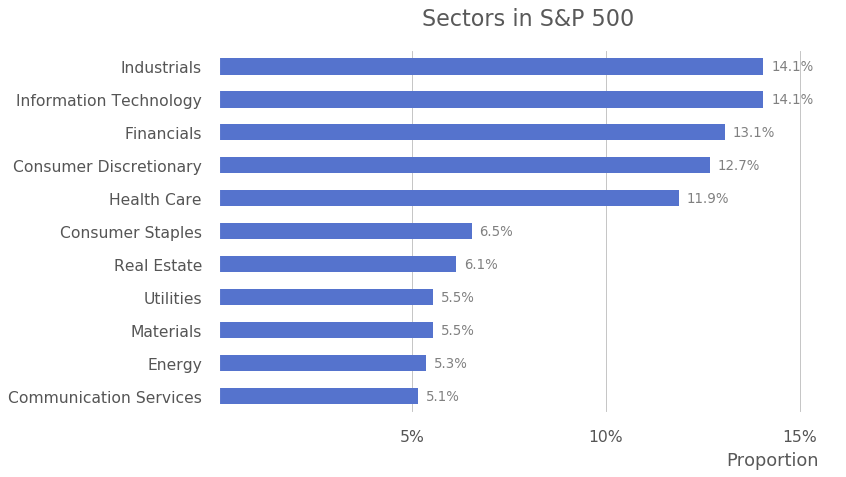

In [505]:
sector_count = stock.Sector.value_counts().sort_values()/len(stock)

plt.style.use('ggplot')
plt.rc('font', **{'size'   : 16})
fig, ax = plt.subplots(figsize=(12,7), dpi= 80)

ax.set_facecolor('white')
sector_count.plot.barh(figsize=[10,6], color='#5573CD', ax=ax)

ax.tick_params(axis='both', length=0, pad=15, labelsize=14)

ax.grid(False)
ax.grid(axis='x', color='silver')
ax.set_xlim(0,0.16)
ax.set_xticks(np.arange(0.05,0.16,0.05))
ax.set_xticklabels(['{0:.0%}'.format(i) for i in np.arange(0.05,0.16,0.05)], fontsize=14)

for i, pct in enumerate(sector_count):
    ax.text(pct + .002, i, '{0:.1%}'.format(pct), color='grey', fontsize=12, ha='left', va='center')

ax.text(.155, -2.1, 'Proportion', ha='right', color='#595959')

plt.title('Sectors in S&P 500', fontsize=20, color='#595959', y=1.05)
plt.show()
#plt.savefig('images/The proportion for each sector in sp500.png', facecolor='white', bbox_inches="tight", dpi=85)

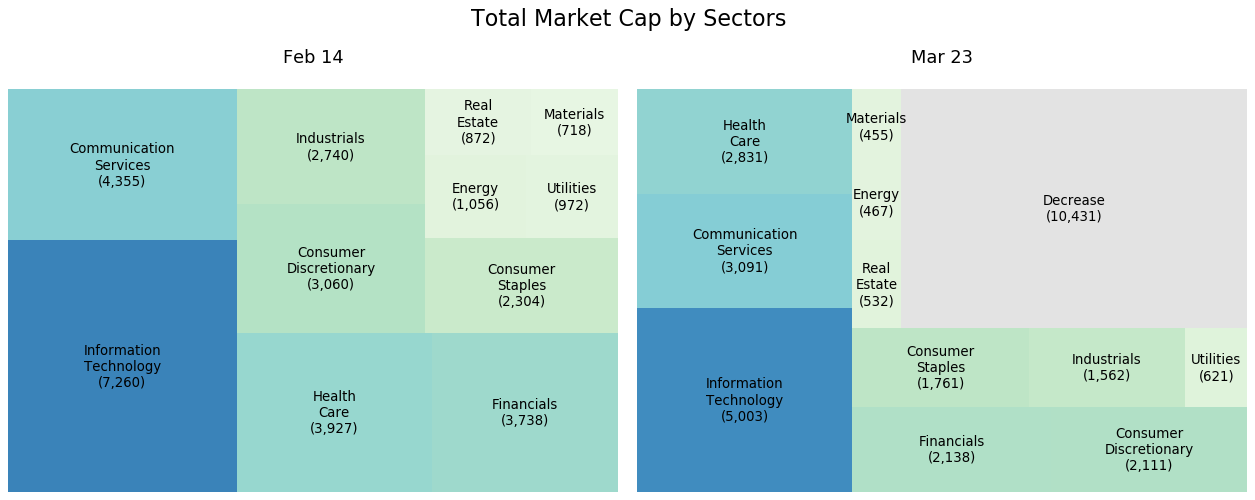

In [444]:
import squarify
import matplotlib as mlt

# Draw Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6), dpi=80) 

df = stock.groupby('Sector')['Market_Cap'].sum().reset_index().sort_values('Market_Cap', ascending=False)
labels = df.apply(lambda row: '{0}\n({1:,.0f})'.format(row['Sector'].replace(' ', '\n'), row['Market_Cap']), axis=1)
sizes = df['Market_Cap'].values.tolist()
norm = mlt.colors.Normalize(vmin=min(sizes)-1000, vmax=max(sizes)+1000)
colors = [mlt.cm.GnBu(norm(value)) for value in sizes]

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':12}, ax=ax[0])


df = stock.groupby('Sector')['Weighted_VR_0323'].sum().reset_index().sort_values('Weighted_VR_0323', ascending=False)
df2 = pd.DataFrame(['Decrease', stock.eval('Market_Cap - Weighted_VR_0323').sum()], index = ['Sector', 'Weighted_VR_0323']).T
df = pd.concat([df, df2]).reset_index()
labels = df.apply(lambda row: '{0}\n({1:,.0f})'.format(row['Sector'].replace(' ', '\n'), row['Weighted_VR_0323']), axis=1)
sizes = df['Weighted_VR_0323'].values.tolist()
norm = mlt.colors.Normalize(vmin=min(sizes)-1000, vmax=max(sizes[:-1])+1000)
colors = [mlt.cm.GnBu(norm(value)) for value in sizes[:-1]] + ['gainsboro']

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':12}, ax=ax[1])

for i, title in enumerate(['Feb 14', 'Mar 23']):
    ax[i].axis('off')
    ax[i].set_title(title, fontsize=16, y=1.05)

# Decorate
plt.suptitle('Total Market Cap by Sectors', y=1.05, fontsize=20)
plt.tight_layout()

#plt.show()
plt.savefig('images/Marketcap Change by Sectors.png', facecolor='white', bbox_inches="tight", dpi=85)

# Clustering Results

In [448]:
x='buffalo'    
exec("%s = %d" % (x,2))
print(buffalo)

2


In [445]:
# define colors
text_color = ['firebrick', 'darkgreen', 'darkblue']
color = ['tomato','mediumseagreen', 'royalblue']

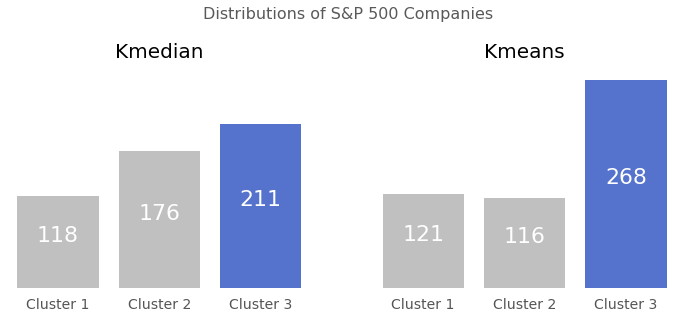

In [499]:
kmedian_cluster = stock['kmedian_cluster'].value_counts().reset_index()
kmeans_cluster = stock['kmeans_cluster'].value_counts().reset_index()
method_dict = {'kmedian_cluster': kmedian_cluster, 'kmeans_cluster': kmeans_cluster}


plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12,4])

for i, method in enumerate(['kmedian_cluster', 'kmeans_cluster']):
    clustering = method_dict[method]
    sns.barplot(ax=ax[i], x='index', y=method, data=clustering,
                palette=[color[2] if (i == clustering[method].min()) else 'silver' for i in clustering[method]])
    ax[i].set_facecolor('white')
    for index, row in clustering.iterrows():
        ax[i].text(row['index']-1, 0.5*row[method], str(row[method]), color='white', ha="center", fontsize=22)
        
    ax[i].set_title(method[:-8].capitalize(), fontsize=20, y=1.03)


    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticklabels(['Cluster '+str(i) for i in range(1,4)], fontsize=14)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='both', which='both', length=0, pad=10)
    ax[i].set_ylim(0,280)
    
plt.suptitle('Distributions of S&P 500 Companies', x=.52, y=1.1, fontsize=16, color='#595959', ha='center')

plt.show()
#plt.savefig('images/clustering results.png',bbox_inches="tight")

# Interpret Results

In [183]:
# Relabel Clusters
stock['kmedian_cluster'] = stock['kmedian_cluster'].map({1:'LVR',2:'HVR',3:'MVR'})

In [191]:
company = pd.pivot_table(index='Sector', columns=['kmedian_cluster'], values='Market_Cap', aggfunc='count', data=stock)
company = company.iloc[:, [1,2,0]]
company = company.iloc[:, :3].div(company.sum(axis=1), axis=0).round(2).reset_index()
company['max'] = np.matrix(company.iloc[:,1:]).argmax(axis=1)
company['max'] = company['max'].map({0:'LVR', 1:'MVR', 2:'HVR'})
company = company.iloc[[4,6,10,9,10,0,2,5,7,1,3]]
company.head()

kmedian_cluster,Sector,LVR,MVR,HVR,max
4,Financials,0.33,0.58,0.09,MVR
6,Industrials,0.23,0.54,0.24,MVR
10,Utilities,0.04,0.54,0.43,MVR
9,Real Estate,0.29,0.45,0.26,MVR
10,Utilities,0.04,0.54,0.43,MVR


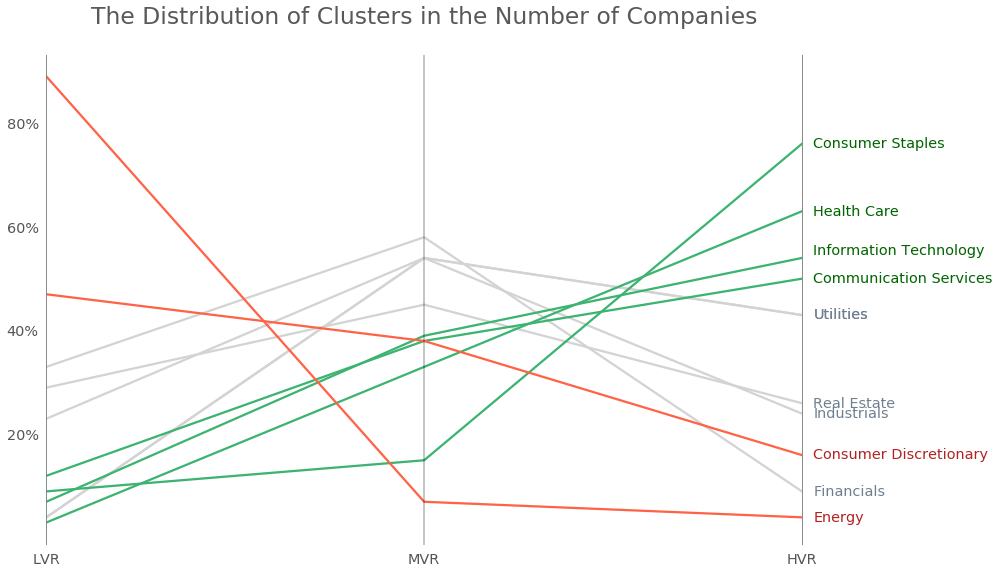

In [228]:
# Make the plot
plt.style.use('ggplot')
plt.figure(figsize=[15,10], dpi=65)
p = parallel_coordinates(company.iloc[:,1:], 
                         'max', 
                         color=['lightgrey',color[1],color[0]], #colormap=plt.get_cmap("Accent")
                         axvlines=False,
                         linewidth=2.5)

p.set_facecolor('white')
p.spines['right'].set_color('0.5')
p.spines['left'].set_color('0.5')
plt.axvline(x=1, linewidth=0.5, color='black')
plt.yticks(np.arange(0.2, 0.8, step=0.2))
p.tick_params(axis='both', which='both', width=0, pad=5, color='white')
plt.xticks(fontsize=16)
p.set_yticklabels([str(i)+'%' for i in range(20,81,20)])
plt.yticks(fontsize=16)

for index, row in company.iterrows():
    if row['max'] == 'LVR': 
        c = text_color[0]
    elif row['max'] == 'HVR': 
        c = text_color[1]
    else: c ='slategrey'
    if row['Sector'] == 'Information Technology':
        plt.text(2.03, row['HVR']+.015, str(row['Sector']), color=c, fontsize=16, va='center')
    else: 
        plt.text(2.03, row['HVR'], str(row['Sector']), color=c, fontsize=16, va='center')
    plt.legend().remove()

    plt.title('The Distribution of Clusters in the Number of Companies', fontsize=26, y=1.05, color='#595959')

#plt.show()
plt.savefig('images/Percentages of Clsuters in each Sector (all).png', facecolor='white', bbox_inches="tight", dpi=85)

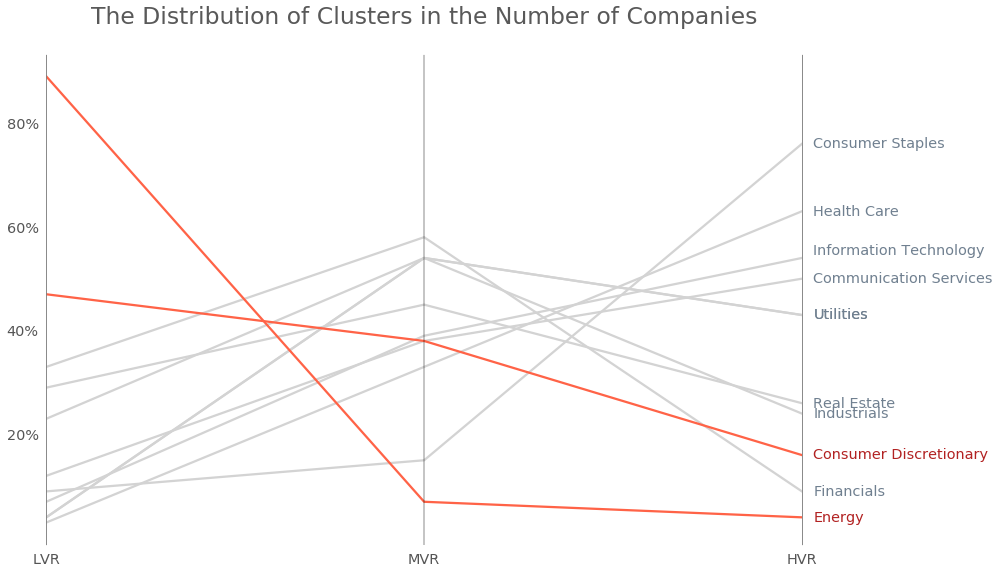

In [230]:
# Make the plot
plt.style.use('ggplot')
plt.figure(figsize=[15,10], dpi=65)
p = parallel_coordinates(company.iloc[:,1:], 
                         'max', 
                         color=['lightgrey','lightgrey',color[0]], #colormap=plt.get_cmap("Accent")
                         axvlines=False,
                         linewidth=2.5)

p.set_facecolor('white')
p.spines['right'].set_color('0.5')
p.spines['left'].set_color('0.5')
plt.axvline(x=1, linewidth=0.5, color='black')
plt.yticks(np.arange(0.2, 0.8, step=0.2))
p.tick_params(axis='both', which='both', width=0, pad=5, color='white')
plt.xticks(fontsize=16)
p.set_yticklabels([str(i)+'%' for i in range(20,81,20)])
plt.yticks(fontsize=16)

for index, row in company.iterrows():
    if row['max'] == 'LVR': c = text_color[0]
    else: c ='slategrey'
    if row['Sector'] == 'Information Technology':
        plt.text(2.03, row['HVR']+.015, str(row['Sector']), color=c, fontsize=16, va='center')
    else: 
        plt.text(2.03, row['HVR'], str(row['Sector']), color=c, fontsize=16, va='center')
    plt.legend().remove()

    plt.title('The Distribution of Clusters in the Number of Companies', fontsize=26, y=1.05, color='#595959')

plt.show()
#plt.savefig('images/Percentages of Clsuters in each Sector (highlight negative).png', facecolor='white', bbox_inches="tight", dpi=85)

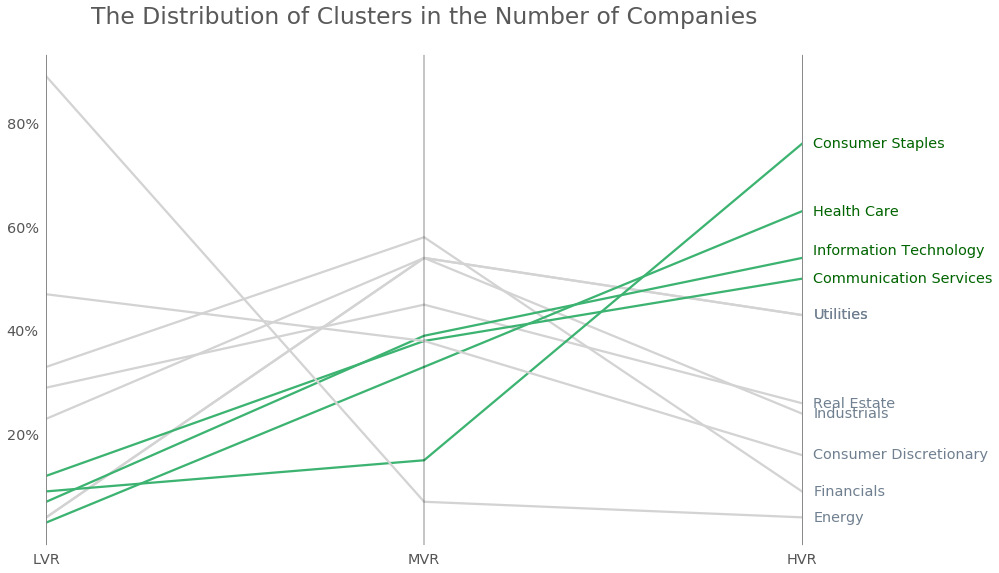

In [229]:
# Make the plot
plt.style.use('ggplot')
plt.figure(figsize=[15,10], dpi=65)
p = parallel_coordinates(company.iloc[:,1:], 
                         'max', 
                         color=['lightgrey',color[1],'lightgrey'], #colormap=plt.get_cmap("Accent")
                         axvlines=False,
                         linewidth=2.5)

p.set_facecolor('white')
p.spines['right'].set_color('0.5')
p.spines['left'].set_color('0.5')
plt.axvline(x=1, linewidth=0.5, color='black')
plt.yticks(np.arange(0.2, 0.8, step=0.2))
p.tick_params(axis='both', which='both', width=0, pad=5, color='white')
plt.xticks(fontsize=16)
p.set_yticklabels([str(i)+'%' for i in range(20,81,20)])
plt.yticks(fontsize=16)

for index, row in company.iterrows():
    if (row['max'] == 'HVR'): c = text_color[1]
    else: c ='slategrey'
    if row['Sector'] == 'Information Technology':
        plt.text(2.03, row['HVR']+.015, str(row['Sector']), color=c, fontsize=16, va='center')
    else: 
        plt.text(2.03, row['HVR'], str(row['Sector']), color=c, fontsize=16, va='center')
    plt.legend().remove()

    plt.title('The Distribution of Clusters in the Number of Companies', fontsize=26, y=1.05, color='#595959')

plt.show()
#plt.savefig('images/Percentages of Clsuters in each Sector (highlight positive).png', facecolor='white', bbox_inches="tight", dpi=85)

In [196]:
marketcap = pd.pivot_table(index='Sector', columns=['kmedian_cluster'], values='Market_Cap', aggfunc='sum', data=stock)
marketcap = marketcap.iloc[:, [1,2,0]]
marketcap = marketcap.iloc[:, :3].div(marketcap.sum(axis=1), axis=0).round(2).reset_index()
marketcap['max'] = np.matrix(marketcap.iloc[:,1:]).argmax(axis=1)
marketcap['max'] = marketcap['max'].map({0:'LVR', 1:'MVR', 2:'HVR'})
marketcap = marketcap.iloc[[4,6,10,9,10,0,2,5,7,1,3]]
marketcap.head()

kmedian_cluster,Sector,LVR,MVR,HVR,max
4,Financials,0.23,0.58,0.19,MVR
6,Industrials,0.28,0.49,0.23,MVR
10,Utilities,0.01,0.61,0.37,MVR
9,Real Estate,0.21,0.37,0.42,HVR
10,Utilities,0.01,0.61,0.37,MVR


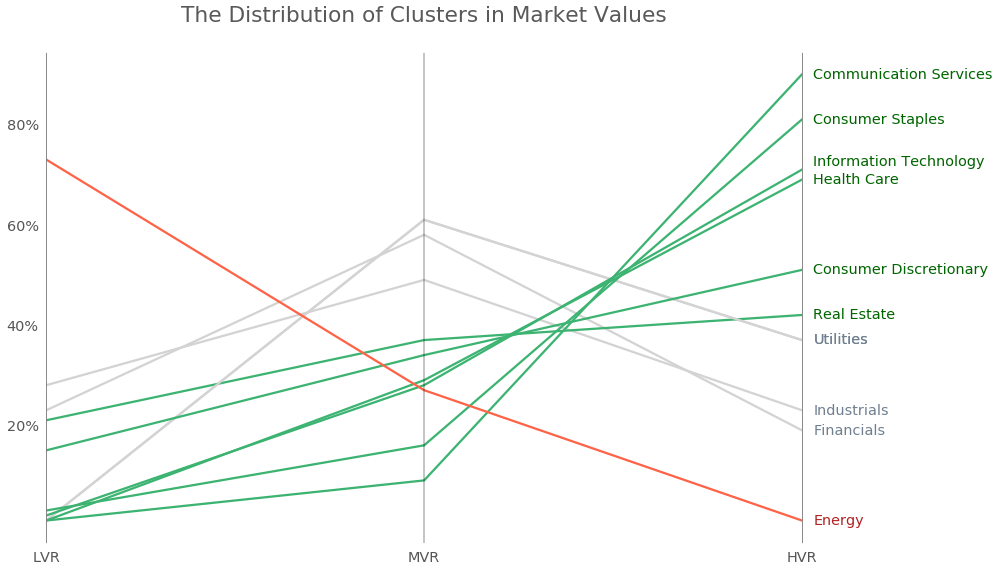

In [225]:
# Make the plot
plt.style.use('ggplot')
plt.figure(figsize=[15,10], dpi=65) 
p = parallel_coordinates(marketcap.iloc[:,1:], 
                         'max', 
                         color=['lightgrey',color[1],color[0]], #colormap=plt.get_cmap("Accent")
                         axvlines=False,
                         linewidth=2.5)

p.set_facecolor('white')
p.spines['right'].set_color('0.5')
p.spines['left'].set_color('0.5')
plt.axvline(x=1, linewidth=0.5, color='black')
plt.yticks(np.arange(0.2, 0.8, step=0.2))
p.tick_params(axis='both', which='both', width=0, pad=5, color='white')
plt.xticks(fontsize=16)
p.set_yticklabels([str(i)+'%' for i in range(20,81,20)])
plt.yticks(fontsize=16)

for index, row in marketcap.iterrows():
    if row['max'] == 'LVR': 
        c = text_color[0]
    elif row['max'] == 'HVR': 
        c = text_color[1]
    else: c ='slategrey'
    if row['Sector'] == 'Information Technology':
        plt.text(2.03, row['HVR']+.015, str(row['Sector']), color=c, fontsize=16, va='center')
    else: 
        plt.text(2.03, row['HVR'], str(row['Sector']), color=c, fontsize=16, va='center')
    plt.legend().remove()

    plt.title('The Distribution of Clusters in Market Values', fontsize=24, y=1.05, color='#595959')

plt.show()
#plt.savefig('images/The Distribution of Clusters in Market Values for each Sector (all).png', facecolor='white', bbox_inches="tight", dpi=85)

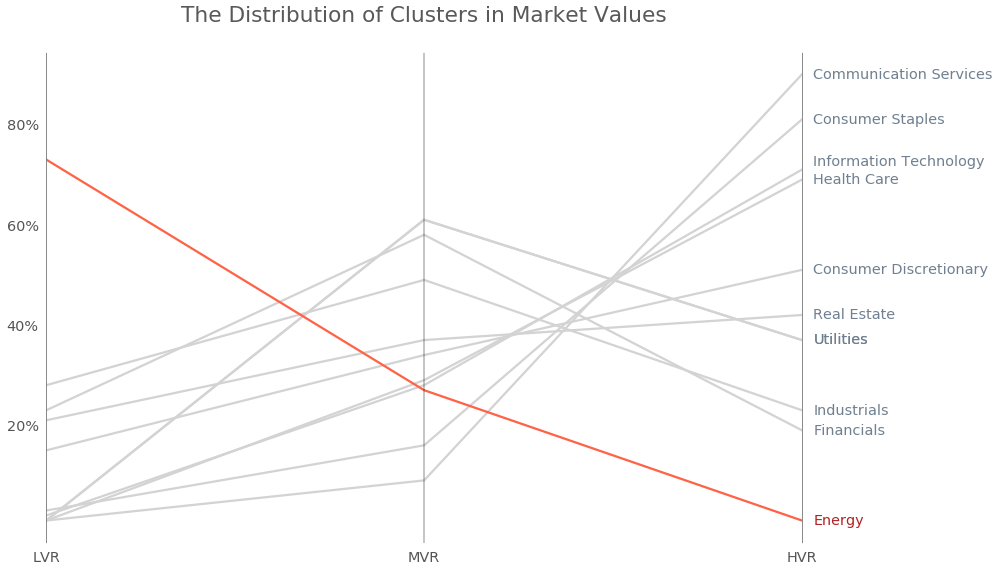

In [227]:
# Make the plot
plt.style.use('ggplot')
plt.figure(figsize=[15,10], dpi=65) 
p = parallel_coordinates(marketcap.iloc[:,1:], 
                         'max', 
                         color=['lightgrey','lightgrey',color[0]], #colormap=plt.get_cmap("Accent")
                         axvlines=False,
                         linewidth=2.5)

p.set_facecolor('white')
p.spines['right'].set_color('0.5')
p.spines['left'].set_color('0.5')
plt.axvline(x=1, linewidth=0.5, color='black')
plt.yticks(np.arange(0.2, 0.8, step=0.2))
p.tick_params(axis='both', which='both', width=0, pad=5, color='white')
plt.xticks(fontsize=16)
p.set_yticklabels([str(i)+'%' for i in range(20,81,20)])
plt.yticks(fontsize=16)

for index, row in marketcap.iterrows():
    if row['max'] == 'LVR': c = text_color[0]
    else: c ='slategrey'
    if row['Sector'] == 'Information Technology':
        plt.text(2.03, row['HVR']+.015, str(row['Sector']), color=c, fontsize=16, va='center')
    else: 
        plt.text(2.03, row['HVR'], str(row['Sector']), color=c, fontsize=16, va='center')
    plt.legend().remove()

    plt.title('The Distribution of Clusters in Market Values', fontsize=24, y=1.05, color='#595959')

plt.show()
#plt.savefig('images/The Distribution of Clusters in Market Values for each Sector (highlight negative).png', facecolor='white', bbox_inches="tight", dpi=85)

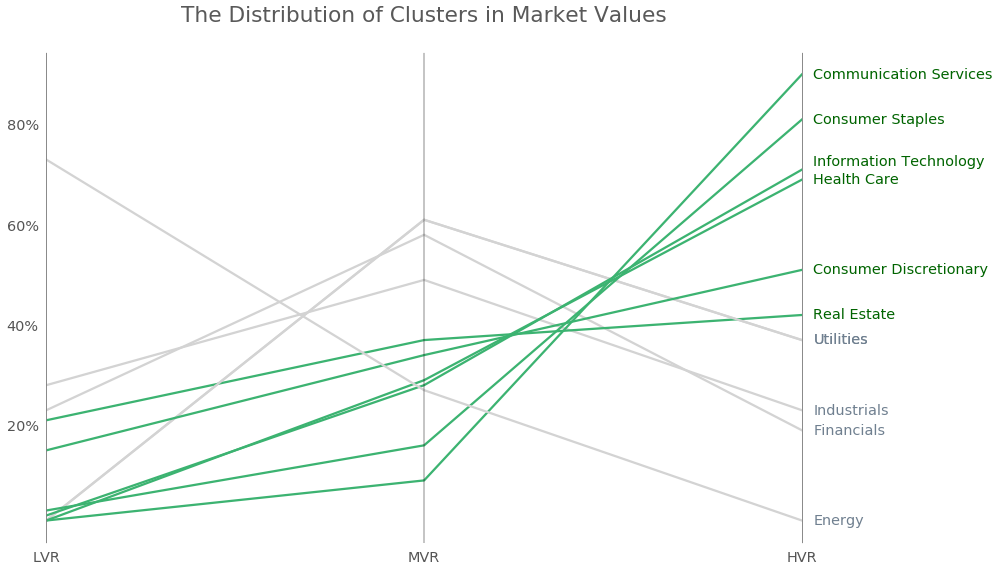

In [226]:
# Make the plot
plt.style.use('ggplot')
plt.figure(figsize=[15,10], dpi=65)
p = parallel_coordinates(marketcap.iloc[:,1:], 
                         'max', 
                         color=['lightgrey',color[1],'lightgrey'], #colormap=plt.get_cmap("Accent")
                         axvlines=False,
                         linewidth=2.5)

p.set_facecolor('white')
p.spines['right'].set_color('0.5')
p.spines['left'].set_color('0.5')
plt.axvline(x=1, linewidth=0.5, color='black')
plt.yticks(np.arange(0.2, 0.8, step=0.2))
p.tick_params(axis='both', which='both', width=0, pad=5, color='white')
plt.xticks(fontsize=16)
p.set_yticklabels([str(i)+'%' for i in range(20,81,20)])
plt.yticks(fontsize=16)

for index, row in marketcap.iterrows():
    if (row['max'] == 'HVR'): c = text_color[1]
    else: c ='slategrey'
    if row['Sector'] == 'Information Technology':
        plt.text(2.03, row['HVR']+.015, str(row['Sector']), color=c, fontsize=16, va='center')
    else: 
        plt.text(2.03, row['HVR'], str(row['Sector']), color=c, fontsize=16, va='center')
    plt.legend().remove()

    plt.title('The Distribution of Clusters in Market Values', fontsize=24, y=1.05, color='#595959')

plt.show()
#plt.savefig('images/The Distribution of Clusters in Market Values for each Sector (highlight positive).png', facecolor='white', bbox_inches="tight", dpi=85)

In [203]:
VR = (pd.pivot_table(index='Sector', columns=['kmedian_cluster'], values='ValueRetention*Market_Cap', aggfunc='sum', data=stock)
      /pd.pivot_table(index='Sector', columns=['kmedian_cluster'], values='Market_Cap', aggfunc='sum', data=stock))
VR = VR.iloc[:,[1,2,0]].round(2).reset_index().sort_values('HVR')
VR.head()

kmedian_cluster,Sector,LVR,MVR,HVR
10,Utilities,44.52,61.43,68.72
8,Materials,47.35,58.03,71.21
9,Real Estate,43.09,58.96,71.83
4,Financials,45.03,57.06,71.94
7,Information Technology,36.54,61.76,72.40


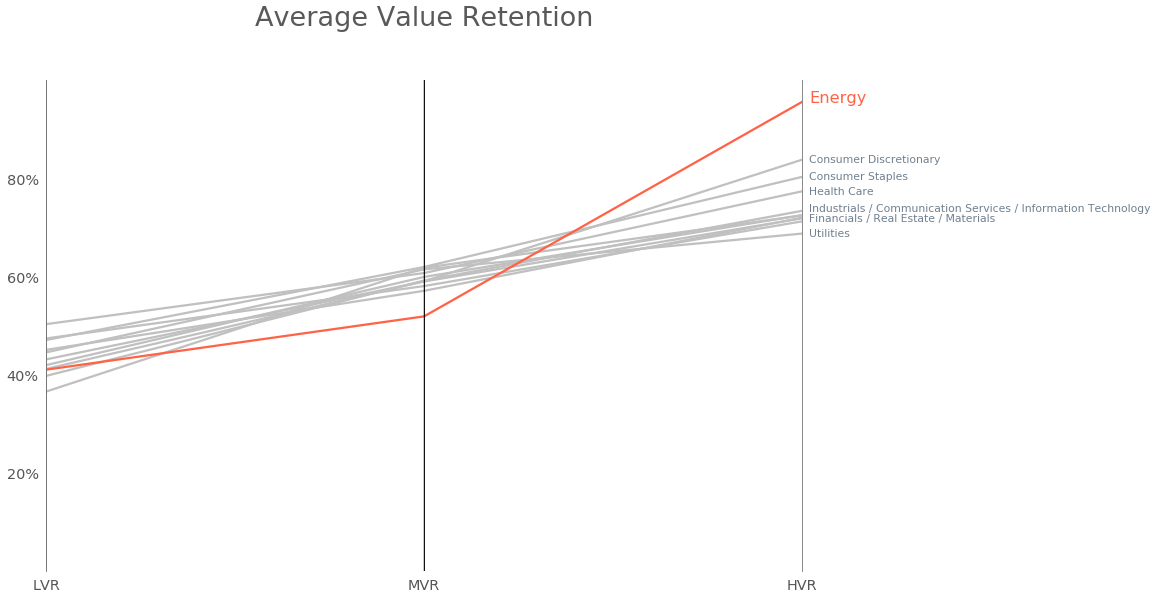

In [224]:
# Make the plot
plt.style.use('ggplot')
plt.figure(figsize=[15,10], dpi=65) 
p = parallel_coordinates(VR, 
                         'Sector', 
                         color=[color[0] if sector == 'Energy' else 'silver' for sector in VR['Sector']], #colormap=plt.get_cmap("Accent")
                         axvlines=True,
                         linewidth=2.5)

for index, row in VR.iterrows():
    if row['Sector'] == 'Energy':
        plt.text(2.02, row['HVR'], row['Sector'], color=color[0], fontsize=18)
    elif row['Sector'] == 'Information Technology':
        plt.text(2.02, row['HVR']+1, 'Industrials / Communication Services / Information Technology', color='slategrey', fontsize=12)
    elif row['Sector'] == 'Materials':
        plt.text(2.02, row['HVR'], 'Financials / Real Estate / Materials', color='slategrey', fontsize=12)
    elif row['Sector'] in [ 'Consumer Discretionary','Consumer Staples','Health Care', 'Utilities']:
        plt.text(2.02, row['HVR']-0.5, str(row['Sector']), color='slategrey', fontsize=12)
        
p.set_facecolor('white')
p.spines['bottom'].set_color(None)
p.spines['top'].set_color(None)
p.spines['right'].set_color('0.5')
p.spines['left'].set_color('0.5')
plt.axvline(x=1, linewidth=0.5, color='black')
plt.yticks(np.arange(20, 81, step=20), fontsize=10)
plt.ylim(0,100)
p.tick_params(axis='both', which='both', width=0, pad=5, color='white')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
p.set_yticklabels([str(i)+'%' for i in range(20,81,20)])
plt.legend().remove()
plt.title('Average Value Retention', fontsize=30, y=1.1, color='#595959')

plt.show()
#plt.savefig('images/Average Value Retention.png', facecolor='white', bbox_inches="tight", dpi=85)

In [525]:
VR_by_sector = (stock.groupby('Sector')[['Weighted_VR_0323','Weighted_VR_0416']].sum()).div(stock.groupby('Sector')['Market_Cap'].sum(), axis=0)
VR_by_sector = VR_by_sector.sort_values('Weighted_VR_0323').reset_index()
VR_by_sector

,Sector,Weighted_VR_0323,Weighted_VR_0416
0,Energy,0.441997,0.995749
1,Industrials,0.569982,0.873256
2,Financials,0.572001,0.849279
3,Real Estate,0.609847,0.997980
4,Materials,0.634272,0.997979
5,Utilities,0.639101,0.998361
6,Information Technology,0.689099,0.998604
7,Consumer Discretionary,0.689799,0.998733
8,Communication Services,0.709646,0.998404
9,Health Care,0.720845,0.999514


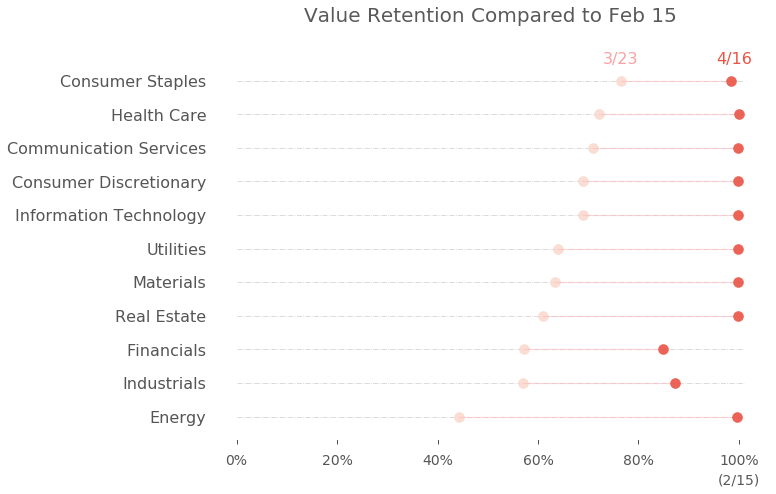

In [526]:
VR_by_sector = (stock.groupby('Sector')[['Weighted_VR_0323','Weighted_VR_0416']].sum()).div(stock.groupby('Sector')['Market_Cap'].sum(), axis=0)*100
VR_by_sector = VR_by_sector.sort_values('Weighted_VR_0323').reset_index()

import matplotlib.lines as mlines
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='lightpink', alpha=0.5, zorder=10)
    ax.add_line(l)
    return l

plt.style.use('ggplot')
# Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(10,7), facecolor='white')
ax.set_facecolor('white')

ax.hlines(y=VR_by_sector.index, xmin=0, xmax=101, color='silver', alpha=0.7, linewidth=0.8, linestyles='dashdot', zorder=5)

# Line Segments
for i, p1, p2 in zip(VR_by_sector.index, VR_by_sector['Weighted_VR_0323'], VR_by_sector['Weighted_VR_0416']*0.99):
    newline([p1, i], [p2, i])
    
# Points
ax.scatter(y=VR_by_sector.index, x=VR_by_sector['Weighted_VR_0323'], s=100, color='#fadacf', alpha=0.9, zorder=10)
ax.scatter(y=VR_by_sector.index, x=VR_by_sector['Weighted_VR_0416'], s=100, color='#ea5345', alpha=0.9, zorder=15)


# Decoration
ax.set_xlabel('')
ax.set_xticks(np.arange(0,101,20))
ax.set_yticks(VR_by_sector.index)
ax.set_xticklabels([str(i) + '%' for i in np.arange(0,101,20)],fontsize=14)
ax.set_yticklabels(VR_by_sector['Sector'].str.title(), fontsize=16)
ax.tick_params(axis='y', which='both', width=0, pad=0)
ax.tick_params(axis='x', which='both', length=5, pad=10)
ax.text(76.44 , 10.5,'3/23', color='#F8A1A4', ha="center", fontsize=16)
ax.text(99 , 10.5,'4/16', color='#ea5345', ha="center", fontsize=16)
ax.text(100, -2, '(2/15)', ha="center", fontsize=14, color='#595959')

plt.title('Value Retention Compared to Feb 15', fontsize=20, color='#595959', y=1.08)
plt.show()
#plt.savefig('data/VR_plot_0323_0416.png',bbox_inches="tight")